In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb


%matplotlib inline


**UK USED CARS**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1= pd.read_csv('/content/drive/MyDrive/Data-Science-project-files/uk used cars/bmw.csv')

In [4]:
df1.head() 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [5]:
numerical_features = df1.select_dtypes("number").columns.to_numpy() ## Updated code 

In [6]:
categorical_features = df1.select_dtypes("object").columns.to_numpy() # Updated code

In [7]:
from pandas.plotting import scatter_matrix # Updated code

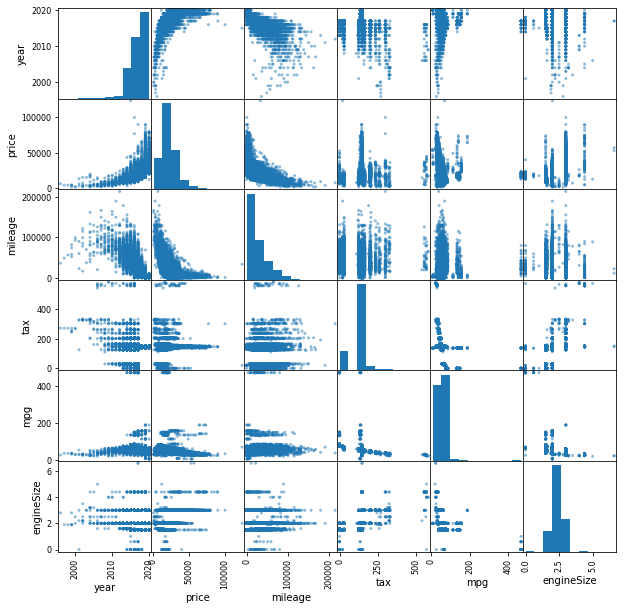

In [8]:
bmw = scatter_matrix(df1[numerical_features], figsize=(10, 10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


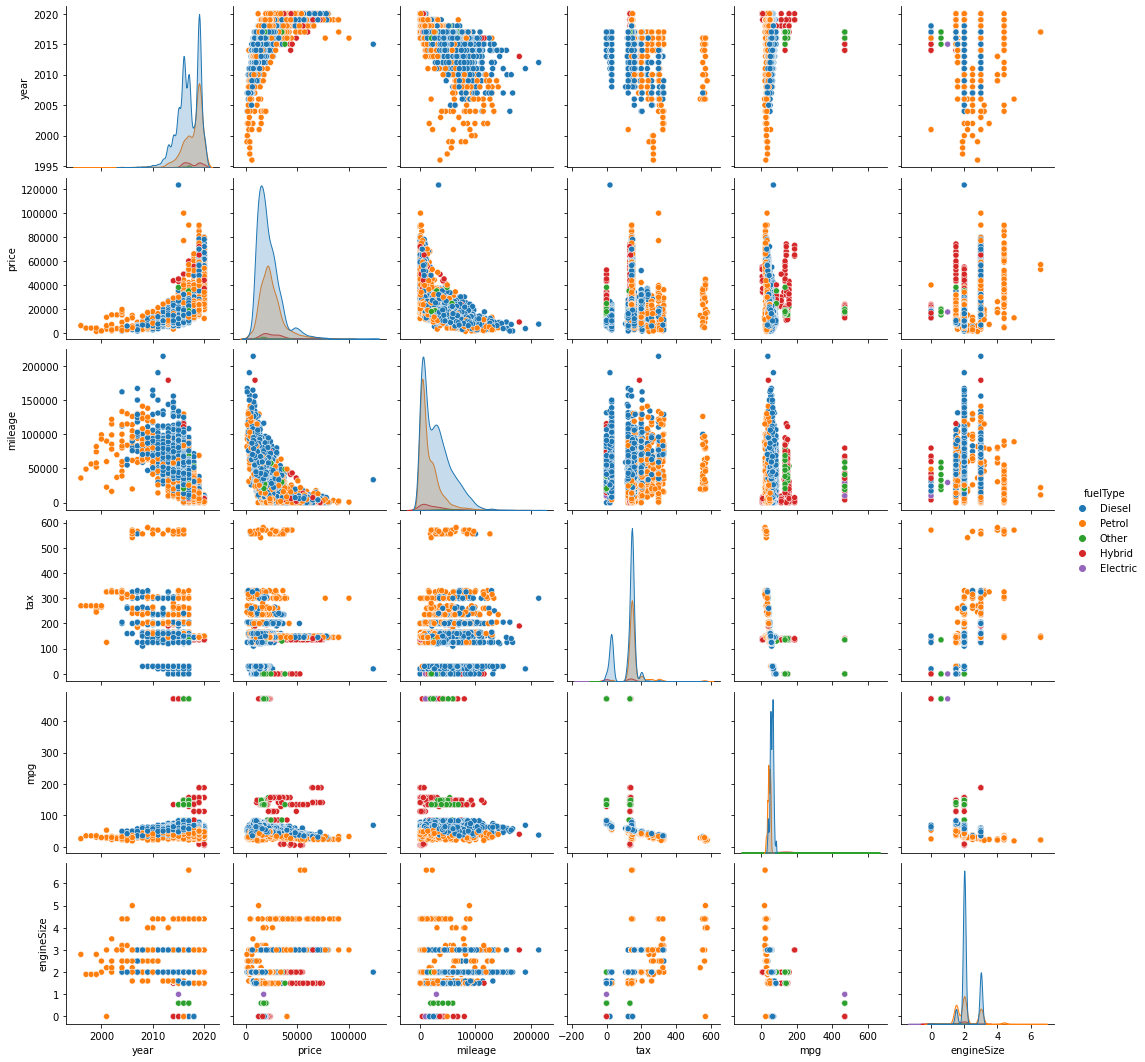

In [9]:
sns.pairplot(df1, hue ='fuelType')

**PEARSON CORRELATION** It is just a number that ranges between -1 & 1, but it is very helpful & it clearly helps in selecting the relevant features from the dataset. The value of the Pearson Correlation Coefficient varies between -1 & 1, where 0 means there is no correlation, the value which is towards -1, means that the features are negatively correlated, & the value towards 1 means that the features are positively correlated.

In [10]:
pearsoncorr = df1.corr(method='pearson')

In [11]:
pearsoncorr

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


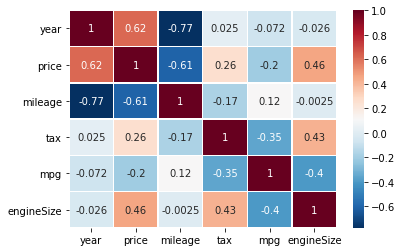

In [12]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [13]:
df1.shape

(10781, 9)

**DATA ANALYSIS**

In [14]:
df1.info

<bound method DataFrame.info of            model  year  price transmission  ...  fuelType  tax   mpg  engineSize
0       5 Series  2014  11200    Automatic  ...    Diesel  125  57.6         2.0
1       6 Series  2018  27000    Automatic  ...    Petrol  145  42.8         2.0
2       5 Series  2016  16000    Automatic  ...    Diesel  160  51.4         3.0
3       1 Series  2017  12750    Automatic  ...    Diesel  145  72.4         1.5
4       7 Series  2014  14500    Automatic  ...    Diesel  160  50.4         3.0
...          ...   ...    ...          ...  ...       ...  ...   ...         ...
10776         X3  2016  19000    Automatic  ...    Diesel  150  54.3         2.0
10777   5 Series  2016  14600    Automatic  ...    Diesel  125  60.1         2.0
10778   3 Series  2017  13100       Manual  ...    Petrol  200  42.8         2.0
10779   1 Series  2014   9930    Automatic  ...    Diesel   30  64.2         2.0
10780         X1  2017  15981    Automatic  ...    Diesel  125  57.6         

In [15]:
df1.dtypes  #data types

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [16]:
df1.head(10) ##### Overview

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


In [17]:
df1.loc[:, df1.isnull().any()].columns  #### NO MISSING VALUES 

Index([], dtype='object')

In [18]:
df1['model']

0         5 Series
1         6 Series
2         5 Series
3         1 Series
4         7 Series
           ...    
10776           X3
10777     5 Series
10778     3 Series
10779     1 Series
10780           X1
Name: model, Length: 10781, dtype: object

In [19]:
model_df1 = df1 ['model']

In [20]:
model_df1.head()

0     5 Series
1     6 Series
2     5 Series
3     1 Series
4     7 Series
Name: model, dtype: object

In [21]:
model_df1.head(100)

0      5 Series
1      6 Series
2      5 Series
3      1 Series
4      7 Series
        ...    
95     1 Series
96           X1
97     3 Series
98     1 Series
99     3 Series
Name: model, Length: 100, dtype: object

In [22]:
#to see the array
type(model_df1)

pandas.core.series.Series

In [23]:
df1.tail(100)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10681,2 Series,2019,21491,Automatic,10000,Petrol,145,47.9,2.0
10682,1 Series,2016,13450,Manual,33043,Diesel,30,62.8,2.0
10683,4 Series,2017,17000,Automatic,61355,Diesel,160,51.4,3.0
10684,X4,2017,22000,Automatic,58056,Diesel,145,54.3,2.0
10685,1 Series,2016,10500,Manual,36792,Diesel,20,68.9,2.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [24]:
df1.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [25]:
df1['transmission'] ### Two features: Automatic and Manual transmission

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
10776    Automatic
10777    Automatic
10778       Manual
10779    Automatic
10780    Automatic
Name: transmission, Length: 10781, dtype: object

In [26]:
df1['price']

0        11200
1        27000
2        16000
3        12750
4        14500
         ...  
10776    19000
10777    14600
10778    13100
10779     9930
10780    15981
Name: price, Length: 10781, dtype: int64

In [27]:
subset = df1[['price', 'transmission']]

In [28]:
subset.head()

,price,transmission
0,11200,Automatic
1,27000,Automatic
2,16000,Automatic
3,12750,Automatic
4,14500,Automatic


In [29]:
df1.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [30]:
df14 = df1.set_index('price', True) ## SETTING PRICE AS INDEX

In [31]:
df14.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
price,,,,,,,,
11200,5 Series,2014,Automatic,67068,Diesel,125,57.6,2.0
27000,6 Series,2018,Automatic,14827,Petrol,145,42.8,2.0
16000,5 Series,2016,Automatic,62794,Diesel,160,51.4,3.0
12750,1 Series,2017,Automatic,26676,Diesel,145,72.4,1.5
14500,7 Series,2014,Automatic,39554,Diesel,160,50.4,3.0


In [32]:
print (df14.index.max()) # MAXIMUM PRICE OF THE CARS

123456


In [33]:
print (df14.index.min()) # MINIMUM PRICE OF THE CARS

1200


In [34]:
bmw = df1.drop_duplicates() # DROPPED THE DUPLICATE ROWS

**DATA EXPLORATION**

**TRANSMISSION**

In [35]:
df1 = df1.replace('?', np.NaN)  ### AS THERE ARE NO MISSING VALUES ## NOT USEFUL

In [36]:
df1.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [37]:
df1.mpg.astype(int)

0        57
1        42
2        51
3        72
4        50
         ..
10776    54
10777    60
10778    42
10779    64
10780    57
Name: mpg, Length: 10781, dtype: int64

In [38]:
df1.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [39]:
bmw.loc[:, ['transmission', 'price']] ### TO SEE RELATION BETWEEN PRICE AND TRANSMISSION

,transmission,price
0,Automatic,11200
1,Automatic,27000
2,Automatic,16000
3,Automatic,12750
4,Automatic,14500
...,...,...
10776,Automatic,19000
10777,Automatic,14600
10778,Manual,13100
10779,Automatic,9930


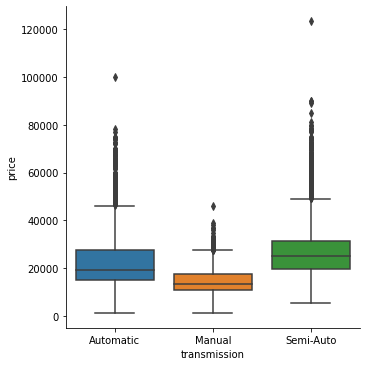

In [40]:
T = sns.catplot(x="transmission", y="price", kind="box", data= bmw) #### Transmission (T) Vs Price

In [41]:
T.savefig('transmission-price.png')

In [42]:
AT = bmw.loc[bmw['transmission'] == 'Automatic', ['transmission', 'price']] ## BMW CARS WITH AUTOMATIC TRANSMISSION

In [43]:
AT.shape

(3542, 2)

In [44]:
MT = bmw.loc[bmw['transmission'] == 'Manual', ['transmission', 'price']]  ###  BMW CARS WITH MANUAL TRANSMISSION

In [45]:
MT.shape

(2485, 2)

In [46]:
SAT = bmw.loc[bmw['transmission'] == 'Semi-Auto', ['transmission', 'price']] ### BMW CARS WITH SEMI-AUTOMATIC TRANSMISSION

In [47]:
SAT.shape

(4637, 2)

**FUEL TYPE**

In [48]:
M = bmw.loc[:, ['fuelType', 'price']]

In [49]:
M.head()

,fuelType,price
0,Diesel,11200
1,Petrol,27000
2,Diesel,16000
3,Diesel,12750
4,Diesel,14500


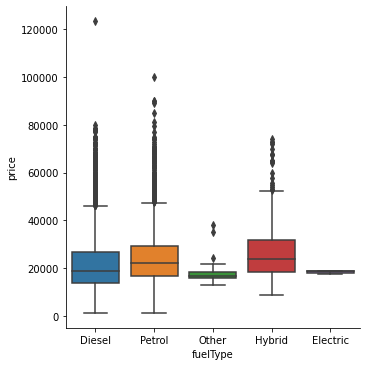

In [50]:
F = sns.catplot(x="fuelType", y="price", kind="box", data= bmw) ### Price based on Fuel Type 

In [51]:
F.savefig('Fuel-price.png')

In [52]:
P = M.loc[M['fuelType'] == 'Petrol', ['fuelType', 'price']] #Petrol

In [53]:
P.shape

(3340, 2)

In [54]:
D = M.loc[M['fuelType'] == 'Diesel', ['fuelType', 'price']] ###Diesel 

In [55]:
D.shape

(6988, 2)

In [56]:
H = M.loc[M['fuelType'] == 'Hybrid', ['fuelType', 'price']] ####Hybrid

In [57]:
H.shape   ### 28 Cars are Hybrid

(297, 2)

In [58]:
 df1.head()
 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


**MILEAGE**

In [59]:
MG =  bmw.loc[:, ['mileage', 'price']] #

In [60]:
MG.head() #

,mileage,price
0,67068,11200
1,14827,27000
2,62794,16000
3,26676,12750
4,39554,14500


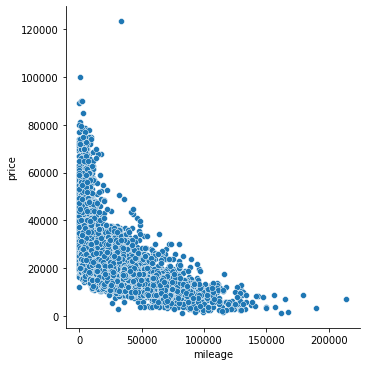

In [61]:
MP = sns.relplot(x="mileage", y="price", data=MG) #

In [62]:
MP.savefig('Mileage-price.png') 

**MLES PER GALLON (mpg) Vs PRICE**

In [63]:
G = bmw.loc[:, ['mpg', 'price']] #######

In [64]:
G.head(20)

,mpg,price
0,57.6,11200
1,42.8,27000
2,51.4,16000
3,72.4,12750
4,50.4,14500
5,60.1,14900
6,60.1,16000
7,52.3,16250
8,62.8,14250
9,68.9,14250


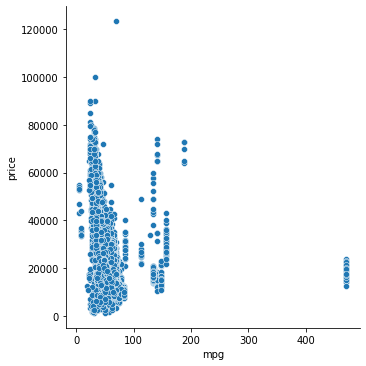

In [65]:
GP = sns.relplot(x="mpg", y="price", data=G)              #####

In [66]:
GP.savefig('MPG-price.png')

**ENGINE SIZE VS PRICE**

In [67]:
E = bmw.loc[:, ['engineSize', 'price']] #######

In [68]:
E.head()

,engineSize,price
0,2.0,11200
1,2.0,27000
2,3.0,16000
3,1.5,12750
4,3.0,14500


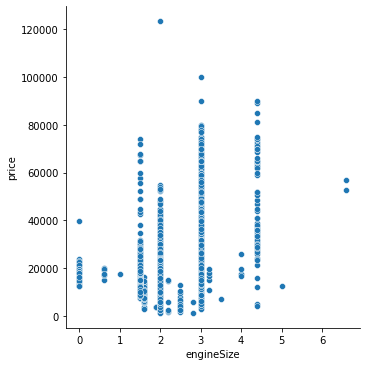

In [69]:
EP = sns.relplot(x="engineSize", y="price", data=E) #######

In [70]:
EP.savefig('EngineSize-Price.png')

**TAX VS price**

In [71]:
TAX = bmw.loc[:, ['tax', 'price']] ######

In [72]:
TAX.head()

,tax,price
0,125,11200
1,145,27000
2,160,16000
3,145,12750
4,160,14500


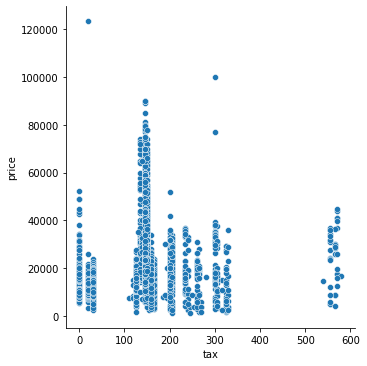

In [73]:
TAXP = sns.relplot(x="tax", y="price", data=TAX) ######

In [74]:
TAXP.savefig('Tax-price.png')

**Machine Learning**

In [75]:
bmw = df1

In [76]:
from sklearn.model_selection import train_test_split  

In [77]:
from sklearn import preprocessing                                       ### library --mathematicalfunction-- min-max -scalar to import 

In [78]:
from sklearn.preprocessing import MinMaxScaler                             ### column of data with different vaue..uniform the data-..normalization...
from sklearn.preprocessing import PolynomialFeatures

In [79]:
from sklearn.linear_model import Ridge                                   ##### mathematical function.. square functiom...error...
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR         
from sklearn.feature_selection import SelectKBest, f_regression   
from sklearn.ensemble import RandomForestRegressor   
from sklearn.neural_network import MLPRegressor   

In [80]:
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [81]:
print(bmw.model.unique()) #categorical features
print(bmw.transmission.unique())
print(bmw.fuelType.unique())

[' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
['Automatic' 'Manual' 'Semi-Auto']
['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']


In [82]:
bmw.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [83]:
bmw_model_data = bmw[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']]
bmw_model_data.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,5 Series,2014,Automatic,67068,Diesel,125,57.6,2.0,11200
1,6 Series,2018,Automatic,14827,Petrol,145,42.8,2.0,27000
2,5 Series,2016,Automatic,62794,Diesel,160,51.4,3.0,16000
3,1 Series,2017,Automatic,26676,Diesel,145,72.4,1.5,12750
4,7 Series,2014,Automatic,39554,Diesel,160,50.4,3.0,14500


In [84]:
bmw_data_dummy = pd.get_dummies(bmw_model_data) ###### dummies.. to have more number of CATEGORICAL features .. indexing
bmw_data_dummy.head()
bmw_data_dummy.shape

(10781, 38)

In [85]:
bmw_data_dummy.head()

,year,mileage,tax,mpg,engineSize,price,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ M2,model_ M3,model_ M4,model_ M5,model_ M6,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ X6,model_ X7,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,67068,125,57.6,2.0,11200,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2018,14827,145,42.8,2.0,27000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2016,62794,160,51.4,3.0,16000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2017,26676,145,72.4,1.5,12750,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2014,39554,160,50.4,3.0,14500,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [86]:
min_max_scaler = preprocessing.MinMaxScaler()                                           # It is to keep the features of numerical values into same range between 0 to 1 so that each feature plays an important role in prediction
BMW_scaled = min_max_scaler.fit_transform(bmw_data_dummy.drop(columns= ['price']))  #USING fit_transform for scaling

In [87]:
bmw_data_DS2 = pd.DataFrame(BMW_scaled)#Here, we see all the 37 features scaled from 0 to 1. One additional unscaled price column converted from scaled price column.  
price = bmw_model_data['price']        
frames = [bmw_data_DS2,price]
bmw_data_DS=pd.concat(frames,axis=1)
print(bmw_data_DS.head())
print(bmw_data_DS.shape)

          0         1         2         3         4  ...   33   34   35   36  price
0  0.750000  0.313399  0.215517  0.111971  0.303030  ...  0.0  0.0  0.0  0.0  11200
1  0.916667  0.069281  0.250000  0.080163  0.303030  ...  0.0  0.0  0.0  1.0  27000
2  0.833333  0.293427  0.275862  0.098646  0.454545  ...  0.0  0.0  0.0  0.0  16000
3  0.875000  0.124650  0.250000  0.143778  0.227273  ...  0.0  0.0  0.0  0.0  12750
4  0.750000  0.184828  0.275862  0.096497  0.454545  ...  0.0  0.0  0.0  0.0  14500

[5 rows x 38 columns]
(10781, 38)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(bmw_data_DS.drop(columns = ['price']),
                                                    bmw_data_DS[['price']],
                                                    test_size = 0.2, random_state = 42)      ### what is random state? every time you run the data, its in the same run constant.. thumb rule::: 42... test size 0f 0.2 indicates that 20% of dataset were taken for testing. 

In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8624, 37)
(8624, 1)
(2157, 37)
(2157, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

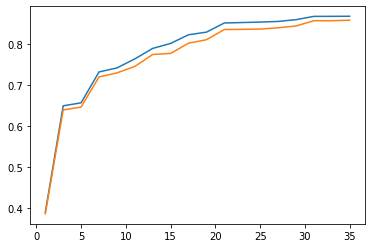

In [90]:
#evaluating best features

features = bmw_data_DS.drop(columns = ['price']).columns

N = []                                                                                              #NO. OF FEATURES 
r_squared_train = []
r_squared_test = []

for k in range(1, 37, 2):                                                                           # 37 is because of 37 features, 1 is the initial, 2 is the step size
    
    selector = SelectKBest(f_regression, k = k)                   
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    LR = LinearRegression()
    LR.fit(X_train_transformed, y_train)
    
    N.append(k)
    r_squared_train.append(LR.score(X_train_transformed, y_train))
    r_squared_test.append(LR.score(X_test_transformed, y_test))
    
sns.lineplot(x = N, y = r_squared_train)
sns.lineplot(x = N, y = r_squared_test)
plt.show()

In [91]:
selector = SelectKBest(f_regression, k = 30)                                     ### k= 23 is the point where features of train and test are fitting 
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
features[selector.get_support()]                                                 # Get a mask, or integer index, of the features selected Parameters. Gives the index of the best features found by highest k score. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index([ 0,  1,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 28, 30, 31, 32, 34, 35, 36],
      dtype='object')

In [92]:
#linear

def regression_function(model):
    
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)                                                                  
    
    return regressor, score

In [93]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
model_selections = [LinearRegression(),  MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in model_selections:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.844237
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.214185
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.844024
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.029203
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.938829


In [94]:
#using polynomials
from sklearn.preprocessing import PolynomialFeatures

In [95]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

(8624, 741)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

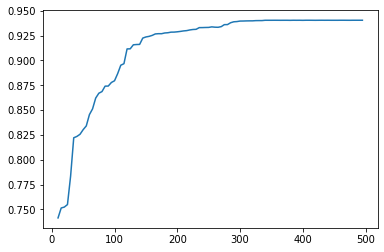

In [96]:
N = []   #no.of features
r_squared = []

for k in range(10, 500, 5): 
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    R = LinearRegression()
    R.fit(X_train_transformed, y_train)
    N.append(k)
    r_squared.append(R.score(X_train_transformed, y_train))
    
sns.lineplot(x = N, y = r_squared)
plt.show()

In [97]:
selector = SelectKBest(f_regression, k =280)

X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

models_used = [LinearRegression(), MLPRegressor(), Ridge(), SVR(), RandomForestRegressor(),]

for model in models_used:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",8.442374e-01
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",2.141846e-01
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",8.440242e-01
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-2.920270e-02
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",9.388292e-01
5,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",-2.537127e+19
6,Polynomial,"MLPRegressor(activation='relu', alpha=0.0001, ...",6.224171e-01
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",9.122803e-01
8,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-3.412555e-02
9,Polynomial,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",9.408163e-01


In [98]:
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)
RF.fit(X_train_transformed_poly, y_train)

y_pred = RF.predict(X_test_transformed_poly) #predicts the price using random forest regression using polynomial features.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [99]:
y_test = y_test.reset_index(drop=True)
y_pred_df = pd.DataFrame({'Price_prediction': y_pred.flatten()})

In [100]:
Comparison = y_test.join(y_pred_df) #Comparing the predicted price vs original price by joining them
Comparison.head(100)

,price,Price_prediction
0,15300,14402.4260
1,15495,13838.4995
2,39875,40765.1740
3,21730,22531.8220
4,13799,16629.5720
...,...,...
95,18990,17279.7900
96,72000,73471.5380
97,13000,14957.0950
98,58990,61930.9170


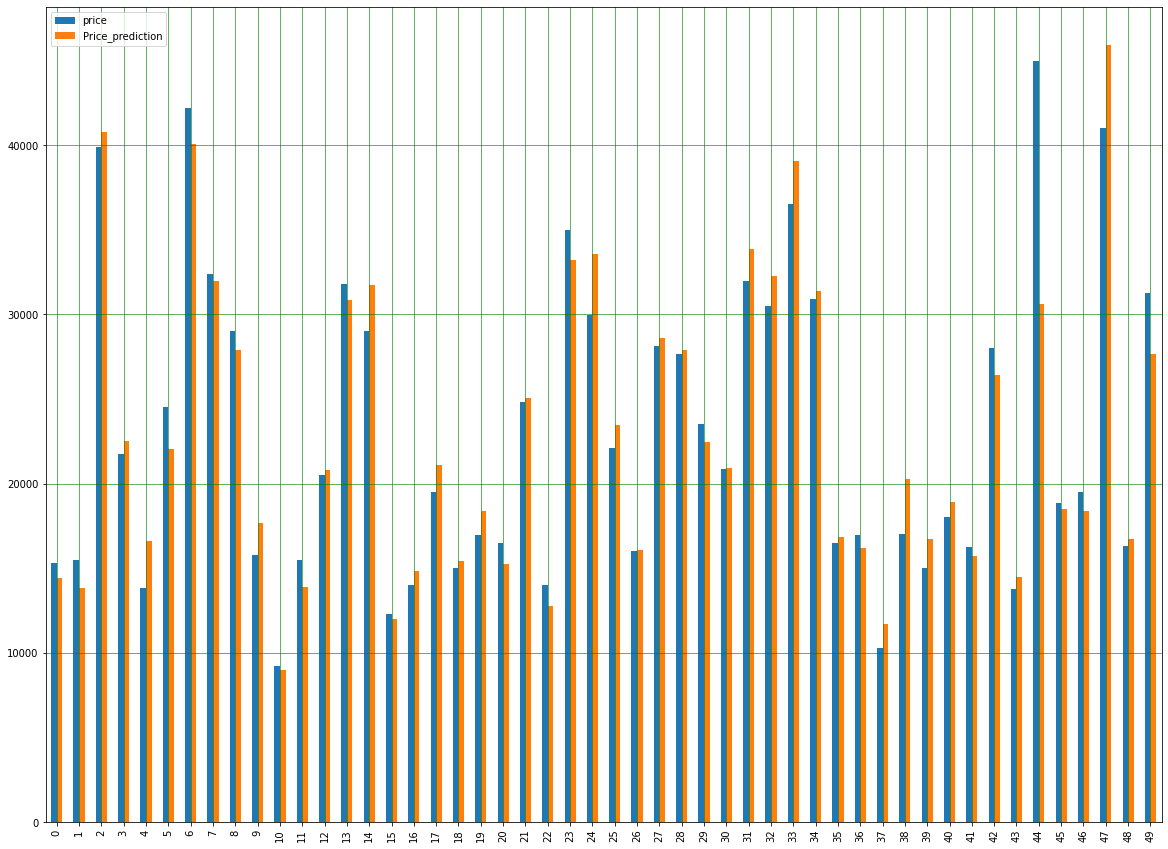

In [101]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'bar', figsize = (20,15))
bmw_pred = plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()


In [102]:
plt.savefig('bmw_prediction_vs_price.png')

<Figure size 432x288 with 0 Axes>

**XG Boost Model**

In [103]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=15000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [104]:
model.fit(X_train,y_train)

[10:21:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=15000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [105]:
y_pred=model.predict(X_test)

In [106]:
from sklearn.metrics import r2_score
R_square=r2_score(y_pred,y_test)
print(R_square)

0.9432917749684541


In [107]:
y_pred_df= pd.DataFrame({'Price_prediction': y_pred})
y_test_df = pd.DataFrame(y_test)
y_test = y_test.reset_index()
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()

,price,Price_prediction
0,15300,15016.406250
1,15495,13689.988281
2,39875,40907.472656
3,21730,21423.029297
4,13799,16031.455078


In [108]:
print(y_pred)

[15016.406 13689.988 40907.473 ... 22191.941 47006.46  49737.402]
